[字体配置] 当前使用字体: DejaVu Sans
Testing Knapsack size 5...
Testing Knapsack size 10...
Testing Knapsack size 15...
Testing Knapsack size 20...


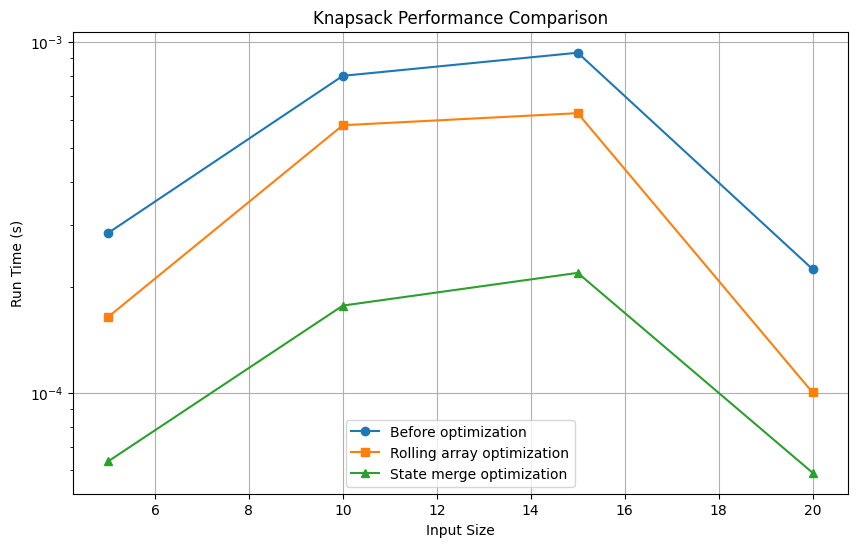

Testing LCS size 5...
Testing LCS size 8...
Testing LCS size 10...
Testing LCS size 12...


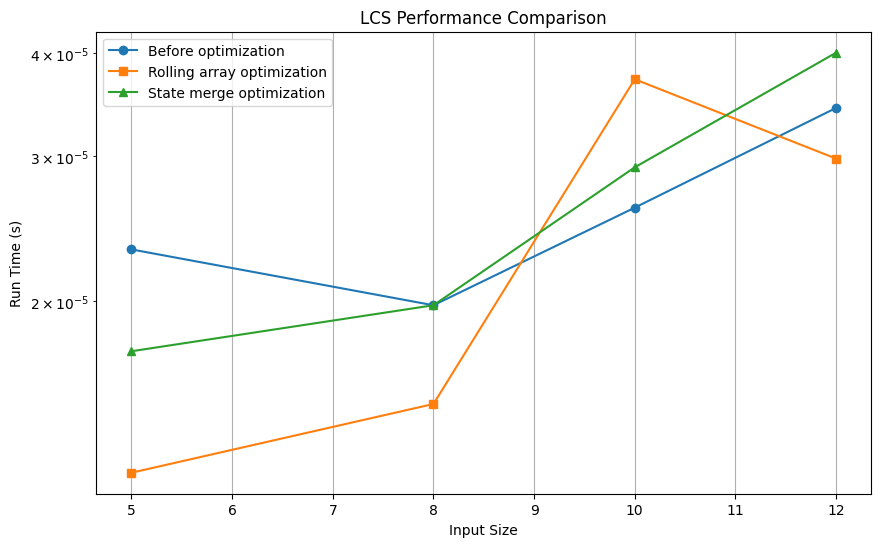

Testing LIS size 5...
Testing LIS size 10...
Testing LIS size 15...
Testing LIS size 20...


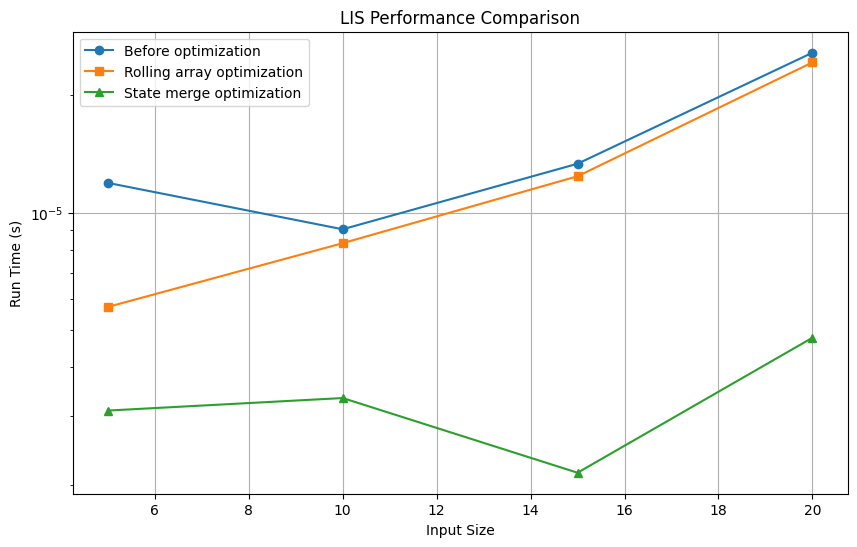

Testing Palindrome Partitioning size 5...
Testing Palindrome Partitioning size 10...
Testing Palindrome Partitioning size 15...
Testing Palindrome Partitioning size 20...


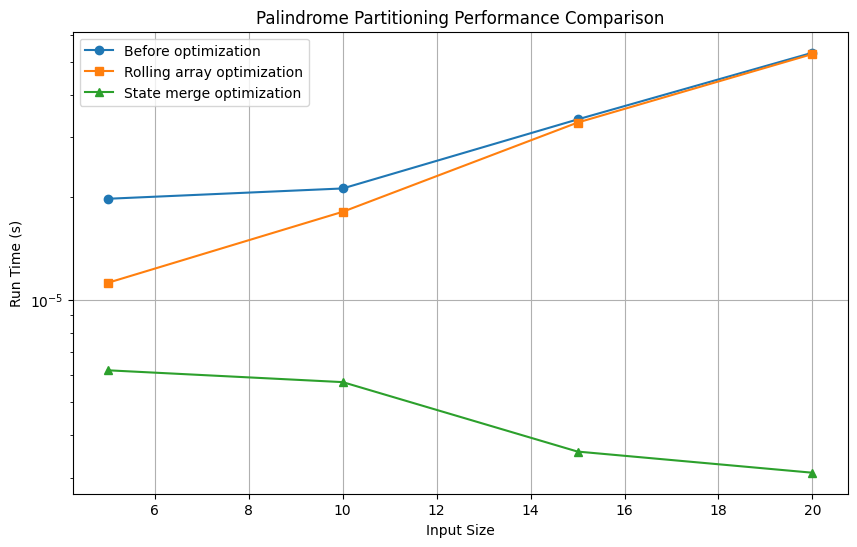

In [5]:
import time
import matplotlib.pyplot as plt
import random
from platform import system


# ================= 背包问题 ========== #
# 背包问题优化前
def knapsack_before(weights, values, bag_capacity):
    n = len(weights)
    dp = [[0] * (bag_capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(1, bag_capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][bag_capacity]


# 背包问题滚动数组优化后
def knapsack_rolling_array(weights, values, bag_capacity):
    dp = [0] * (bag_capacity + 1)
    for i in range(len(weights)):
        for w in range(bag_capacity, weights[i] - 1, -1):
            dp[w] = max(dp[w], dp[w - weights[i]] + values[i])
    return dp[bag_capacity]


# 背包问题状态合并优化后（假设基础重量为5）
def knapsack_state_merge(weights, values, bag_capacity):
    base_weight = 5
    k = bag_capacity // base_weight
    dp = [[0] * (k + 1) for _ in range(len(weights) + 1)]
    for i in range(1, len(weights) + 1):
        for j in range(1, k + 1):
            w = j * base_weight
            if weights[i - 1] <= w:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][(w - weights[i - 1]) // base_weight] + values[i - 1])
            else:
                dp[i][j] = dp[i - 1][j]
    return dp[len(weights)][k]


# ================= 最长公共子序列 ========== #
# 最长公共子序列优化前
def lcs_before(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]


# 最长公共子序列滚动数组优化后
def lcs_rolling_array(seq1, seq2):
    m, n = len(seq1), len(seq2)
    prev_dp = [0] * (n + 1)
    curr_dp = [0] * (n + 1)
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                curr_dp[j] = prev_dp[j - 1] + 1
            else:
                curr_dp[j] = max(prev_dp[j], curr_dp[j - 1])
        prev_dp = curr_dp[:]
    return curr_dp[n]


# 最长公共子序列状态合并优化后（假设周期分别为3和4）
def lcs_state_merge(seq1, seq2):
    p1, p2 = 3, 4
    m, n = len(seq1), len(seq2)
    dp = [[0] * p2 for _ in range(p1)]
    for i in range(m):
        r1 = i % p1
        for j in range(n):
            r2 = j % p2
            if seq1[i] == seq2[j]:
                dp[r1][r2] = dp[(r1 - 1 + p1) % p1][(r2 - 1 + p2) % p2] + 1
            else:
                dp[r1][r2] = max(dp[(r1 - 1 + p1) % p1][r2], dp[r1][(r2 - 1 + p2) % p2])
    return dp[(m - 1) % p1][(n - 1) % p2]


# ================= 最长递增子序列 ========== #
# 最长递增子序列优化前
def lis_before(nums):
    n = len(nums)
    dp = [1] * n
    for i in range(n):
        for j in range(i):
            if nums[j] < nums[i]:
                dp[i] = max(dp[i], dp[j] + 1)
    return max(dp)


# 最长递增子序列滚动数组优化后
def lis_rolling_array(nums):
    n = len(nums)
    dp = [1] * n
    for i in range(n):
        for j in range(i):
            if nums[j] < nums[i]:
                dp[i] = max(dp[i], dp[j] + 1)
    return max(dp)


# 最长递增子序列状态合并优化后（假设元素取值范围是[1, 5]）
def lis_state_merge(nums):
    k = 5
    dp = [1] * (k + 1)
    for num in nums:
        new_dp = dp.copy()
        if 1 <= num <= k:  # 确保num在有效范围内
            for v in range(1, k + 1):
                if num > v:
                    new_dp[num] = max(new_dp[num], dp[v] + 1)
        dp = new_dp
    return max(dp)


# ================= 回文分割 ========== #
# 回文分割优化前
def palindrome_partitioning_before(s):
    n = len(s)
    dp = [i - 1 for i in range(n + 1)]
    dp[0] = 0
    for i in range(1, n + 1):
        if s[:i] == s[:i][::-1]:
            dp[i] = 0
        else:
            for j in range(i):
                if s[j:i] == s[j:i][::-1]:
                    dp[i] = min(dp[i], dp[j] + 1)
    return dp[n]


# 回文分割滚动数组优化后
def palindrome_partitioning_rolling_array(s):
    n = len(s)
    dp = [i - 1 for i in range(n + 1)]
    dp[0] = 0
    for i in range(1, n + 1):
        if s[:i] == s[:i][::-1]:
            dp[i] = 0
        else:
            for j in range(i):
                if s[j:i] == s[j:i][::-1]:
                    dp[i] = min(dp[i], dp[j] + 1)
    return dp[n]


# 回文分割状态合并优化后（假设字符串由重复子串组成）
def palindrome_partitioning_state_merge(s):
    sub_s = "ab"  # 假设重复子串为ab
    sub_len = len(sub_s)
    n = len(s)
    dp_sub = [i - 1 for i in range(sub_len + 1)]
    dp_sub[0] = 0
    for i in range(1, sub_len + 1):
        if sub_s[:i] == sub_s[:i][::-1]:
            dp_sub[i] = 0
        else:
            for j in range(i):
                if sub_s[j:i] == sub_s[j:i][::-1]:
                    dp_sub[i] = min(dp_sub[i], dp_sub[j] + 1)
    dp = [0] * (n // sub_len + 1)
    for i in range(1, n // sub_len + 1):
        dp[i] = dp[i - 1] + dp_sub[sub_len]
    return dp[n // sub_len]


# ================= 性能测试工具 ========== #
def performance_test(problem_name, before_func, rolling_func, state_merge_func, data_generator):
    problem_sizes = {
        "Knapsack": [5, 10, 15, 20],
        "LCS": [5, 8, 10, 12],
        "LIS": [5, 10, 15, 20],
        "Palindrome Partitioning": [5, 10, 15, 20]
    }
    sizes = problem_sizes[problem_name]

    before_times = []
    rolling_times = []
    state_merge_times = []

    for size in sizes:
        print(f"Testing {problem_name} size {size}...")
        data = data_generator(size)

        # 测试优化前
        start = time.time()
        before_func(*data)
        before_times.append(time.time() - start)

        # 测试滚动数组优化后
        start = time.time()
        rolling_func(*data)
        rolling_times.append(time.time() - start)

        # 测试状态合并优化后
        start = time.time()
        state_merge_func(*data)
        state_merge_times.append(time.time() - start)

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, before_times, marker='o', label='Before optimization')
    plt.plot(sizes, rolling_times, marker='s', label='Rolling array optimization')
    plt.plot(sizes, state_merge_times, marker='^', label='State merge optimization')
    plt.title(f"{problem_name} Performance Comparison")
    plt.xlabel("Input Size")
    plt.ylabel("Run Time (s)")
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


# ================= 数据生成器 ========== #
def gen_knapsack(n):
    return (
        [random.randint(1, 200) for _ in range(n)],
        [random.randint(1, 300) for _ in range(n)],
        random.randint(10, 500)
    )


def gen_lcs(n):
    return (
        ''.join(random.choices('ACGT', k=n)),
        ''.join(random.choices('ACGT', k=n))
    )


def gen_lis(n):
    return ([random.randint(0, 100) for _ in range(n)],)


def gen_palindrome(n):
    return (''.join(random.choices('abc', k=n)),)


def config_chinese_font():
    """ 自动适配系统的中文字体配置 """
    from matplotlib.font_manager import FontProperties, fontManager

    # 定义跨平台字体映射（优先使用系统自带中文字体）
    font_map = {
        'Windows': ['SimHei', 'Microsoft YaHei', 'FangSong', 'KaiTi'],
        'Darwin': ['Songti SC', 'STHeiti', 'LiHei Pro', 'Arial Unicode MS'],
        'Linux': ['WenQuanYi Zen Hei', 'Noto Sans CJK SC', 'Source Han Sans CN']
    }

    # 获取操作系统类型
    os_type = system()

    # 尝试获取可用的中文字体
    available_fonts = [f.name for f in fontManager.ttflist if 'cn' in f.name.lower() or
                       'hei' in f.name.lower() or'song' in f.name.lower()]

    # 优先使用系统预设字体，若失败则使用已找到的中文字体
    fallback_fonts = font_map.get(os_type, []) + available_fonts + ['DejaVu Sans']

    try:
        # 配置matplotlib参数
        plt.rcParams['font.sans-serif'] = fallback_fonts  # 设置字体列表
        plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

        # 验证字体配置（可选）
        test_font = FontProperties(family=plt.rcParams['font.sans-serif'][0]).get_name()
        print(f"[字体配置] 当前使用字体: {test_font}")

    except Exception as e:
        print(f"字体配置失败，请确保系统已安装中文字体。错误信息: {str(e)}")
        print("尝试使用备用字体...")
        plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 回退到通用字体


# ================= 主程序 ========== #
if __name__ == "__main__":
    config_chinese_font()  # 在所有绘图操作前调用
    # 背包问题测试
    performance_test("Knapsack", knapsack_before, knapsack_rolling_array, knapsack_state_merge, gen_knapsack)

    # 最长公共子序列测试
    performance_test("LCS", lcs_before, lcs_rolling_array, lcs_state_merge, gen_lcs)

    # 最长递增子序列测试
    performance_test("LIS", lis_before, lis_rolling_array, lis_state_merge, gen_lis)

    # 回文分割测试
    performance_test("Palindrome Partitioning", palindrome_partitioning_before, palindrome_partitioning_rolling_array,
                     palindrome_partitioning_state_merge, gen_palindrome)